# Analyses of Flights Data

# Overview

The dataset gives us information about delayed flights for three years: 1992,2000 and 2008. We have a breakdown available including reason for delay, duration of delay and the origin/destination airport.

## Delay times distribution

The total number of delays has increased, and the distribution has got less skewed over the years as flights are delayed for longer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from jupyterthemes import jtplot

%matplotlib inline

In [2]:
jtplot.style(figsize = (14.70,8.27))

In [3]:
data_clean = pd.read_csv('data_clean.csv')
data_clean_2008 = pd.read_csv('data_clean_2008.csv')

In [4]:
bin_list = np.arange(0, data_clean['ArrDelay'].max()+10, 10)
base_color = sns.color_palette()[0]
sns.set(style="white", context="notebook",rc={'figure.figsize':(10,10)})

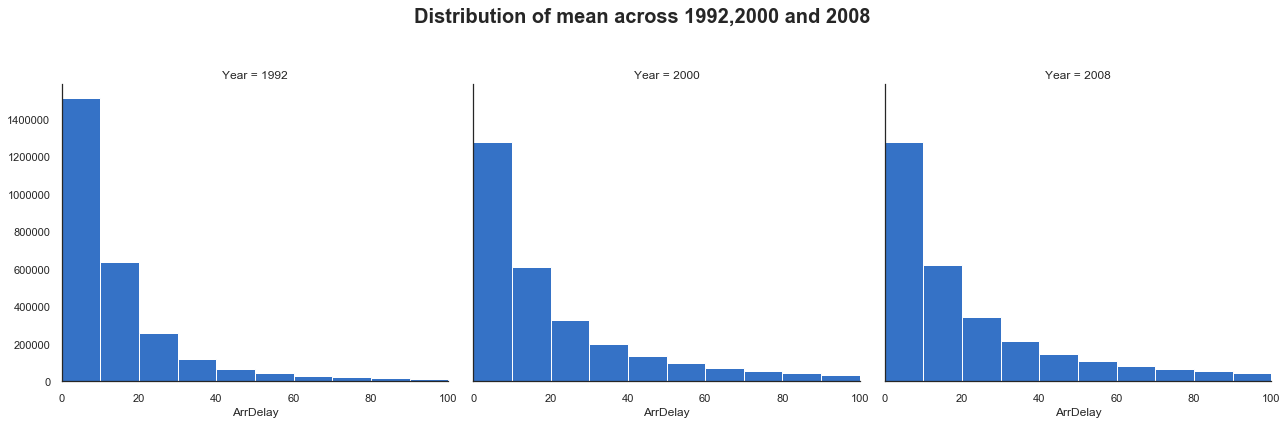

In [5]:
#create a histogram to check the distribution of mean across the different years
g = sns.FacetGrid(data_clean, col='Year', margin_titles = True, height = 6)
g.map(plt.hist, 'ArrDelay',color = base_color, bins= bin_list)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of mean across 1992,2000 and 2008', fontsize = 20, weight = 'bold')
plt.xlim(0,100);

In [6]:
#This doesn't work
print("total delays \n" + 
      "2008: " + str(len(data_clean.query("Year == 2008 & ArrDelay != 0"))/len(data_clean.query("Year == 2008"))), 
      "\n2000: " + str(len(data_clean.query("Year == 2000 & ArrDelay != 0"))/len(data_clean.query("Year == 2000"))),
      "\n1992: " +  str(len(data_clean.query("Year == 1992 & ArrDelay != 0"))/len(data_clean.query("Year == 1992"))))

total delays 
2008: 0.9736196611337844 
2000: 0.9596491107675161 
1992: 0.9525531125611406


We can look at the statistics in more detail with a box plot

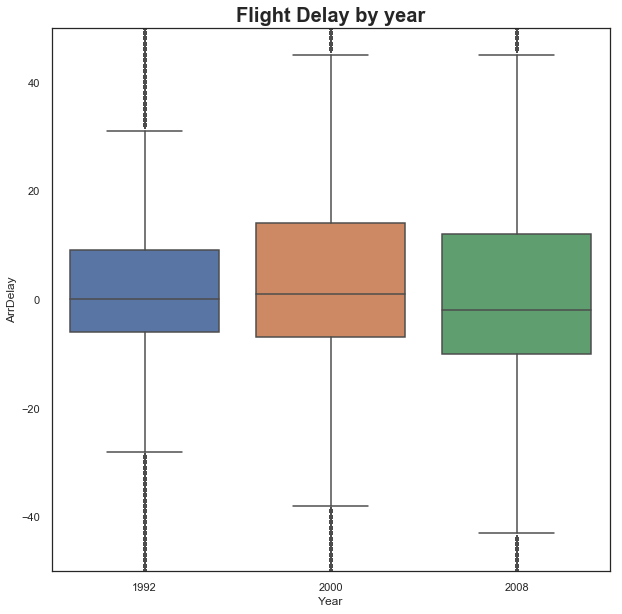

In [7]:
# A boxplot to show how the spectrum has got wider of the delay times, and how we have more flights in the 
# interquartile range
ax = sns.boxplot(y="ArrDelay", x='Year', data= data_clean)
plt.ylim(-50,50)
plt.title('Flight Delay by year', fontsize = 20, weight = 'bold');

## Heatmap for delay distribution

The longest delays are usually due to the weather or Aircraft Delay. The longest and most frequent delays are seen in July and December, also peaking around March. These align to the holiday season and to adverse weather conditions as well.

In [8]:
#Instead of using this everytime, i wrote this function for the next three graphs.
def heatmap(table):
    f, ax = plt.subplots(figsize=(12, 8))
    g = sns.heatmap(table, annot=True, linewidths=.5, ax=ax, cmap =sns.light_palette((260, 75, 60), input="husl"));
    plt.xticks(color = 'black', fontsize = 10)
    plt.yticks(color = 'black', fontsize = 10)
    ax.yaxis.label.set_visible(False)

In [9]:
#create a new dataframe to to make the heatmap
df_2008_heatmap_day = data_clean_2008.filter(items=['DayOfWeek','WeatherDelay','CarrierDelay','NASDelay','SecurityDelay','LateAircraftDelay'])
df_2008_heatmap_day=df_2008_heatmap_day.set_index('DayOfWeek') 
pivot_2008_heatmap_day  = pd.pivot_table(df_2008_heatmap_day, index = df_2008_heatmap_day.index ,aggfunc= lambda x: (x[x!= 0]).mean())

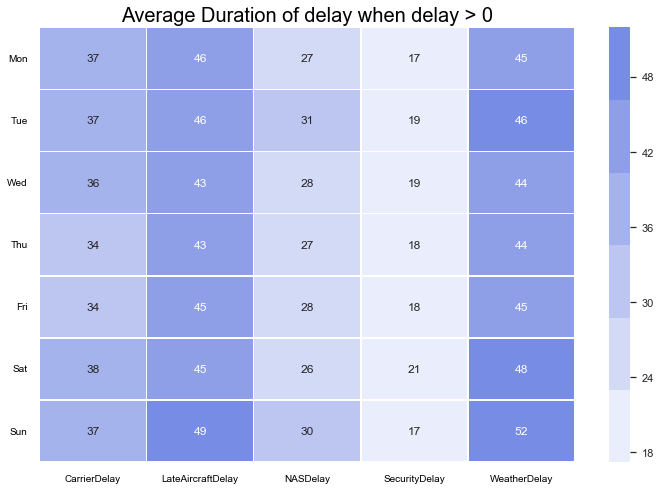

In [10]:
# Weather and Late Aircraft have the longest Delay when we compare across the week by types of delays
heatmap(pivot_2008_heatmap_day)
plt.yticks(np.arange(7)+0.5,('Mon','Tue','Wed','Thu','Fri','Sat','Sun'), rotation=0, fontsize=10, va="center");
plt.title('Average Duration of delay when delay > 0', color = 'black', fontsize = 20);

In [11]:
df_2008_heatmap_month= data_clean_2008.filter(items=['Month','WeatherDelay','CarrierDelay','NASDelay','SecurityDelay','LateAircraftDelay'])
df_2008_heatmap_month = df_2008_heatmap_month.set_index('Month')
pivot_2008_heatmap_month  = pd.pivot_table(df_2008_heatmap_month, index = df_2008_heatmap_month.index ,
                                           aggfunc= lambda x: (x[x!= 0]).mean())

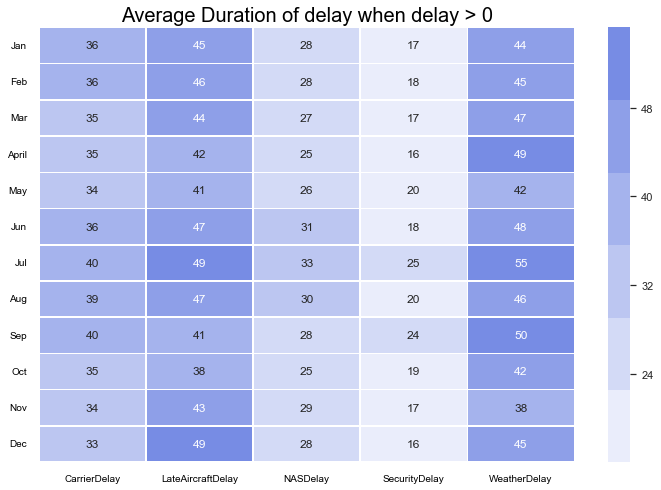

In [12]:
heatmap(pivot_2008_heatmap_month)
plt.yticks(np.arange(12)+0.5,('Jan','Feb','Mar','April','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), rotation=0, fontsize=10, va="center", color = 'black');
plt.title('Average Duration of delay when delay > 0', color = 'black', fontsize = 20);
# July December, and March stand out 

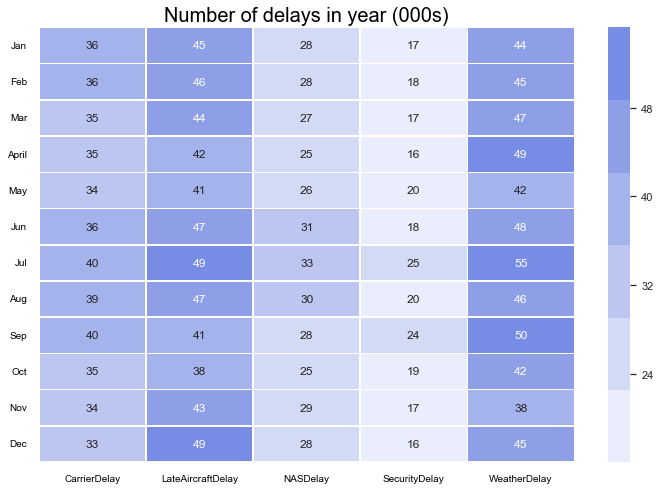

In [13]:
heatmap(pivot_2008_heatmap_month)
plt.yticks(np.arange(12)+0.5,('Jan','Feb','Mar','April','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), rotation=0, fontsize=10, va="center", color = 'black');
plt.title('Number of delays in year (000s)', color = 'black', fontsize = 20);
#same result as graph before where July, December and March stand out

## Distribution by airline

Southwest Airline had the most delay instances while Aloha Airlines had the least, although the first graph does not account for the number of flights so this result could be skewed. The FacetGrid shows the distribution by origin airport as we can see that Atlanta and Orlando experience significant amount of delayed departures from the airport. Different airlines have different hubs where they are the most frequently delayed. The swarm graph shows us the ranking of the different types of delay by airline. Alaska Airlines and Aloha Airlines(only 394 delayed flights) suffer the most carrier delay which is the only type of delay caused by the Airline itself while Frontier airline is the best at avoiding carrier delay relative to other types of delays.

In [14]:
# Replace the US airways name as it is too long in the legend
df_2008_airlines = data_clean_2008.filter(items=['Description','ArrDelay','Origin'])
df_2008_airlines['Description'] = df_2008_airlines['Description'].replace(
    'US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)','US Airways')

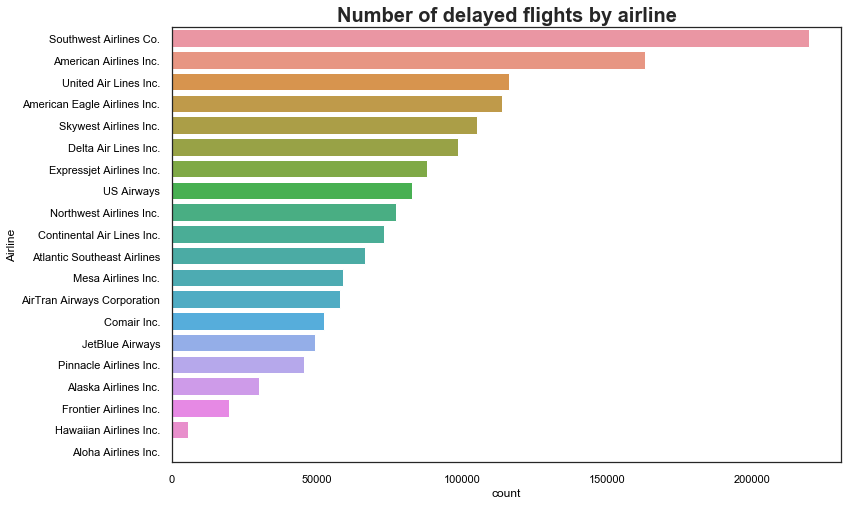

In [15]:
# Create a bar chart to compare the amount of delayed flights by airline
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(y="Description", data=df_2008_airlines, order = df_2008_airlines['Description'].value_counts(ascending=False).index)
ax.set(ylabel ='Airline')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.set_title('Number of delayed flights by airline', fontsize = 20, weight = 'bold')
ax.tick_params(colors='black');

In [16]:
#We will only look at the top 9 airports(most departed flights from airport)
origin = ['ATL','ORD','DFW','DEN','EWR','DTW','IAH','LAX','PHX']
df_2008_airlines = df_2008_airlines[df_2008_airlines['Origin'].isin(origin)]

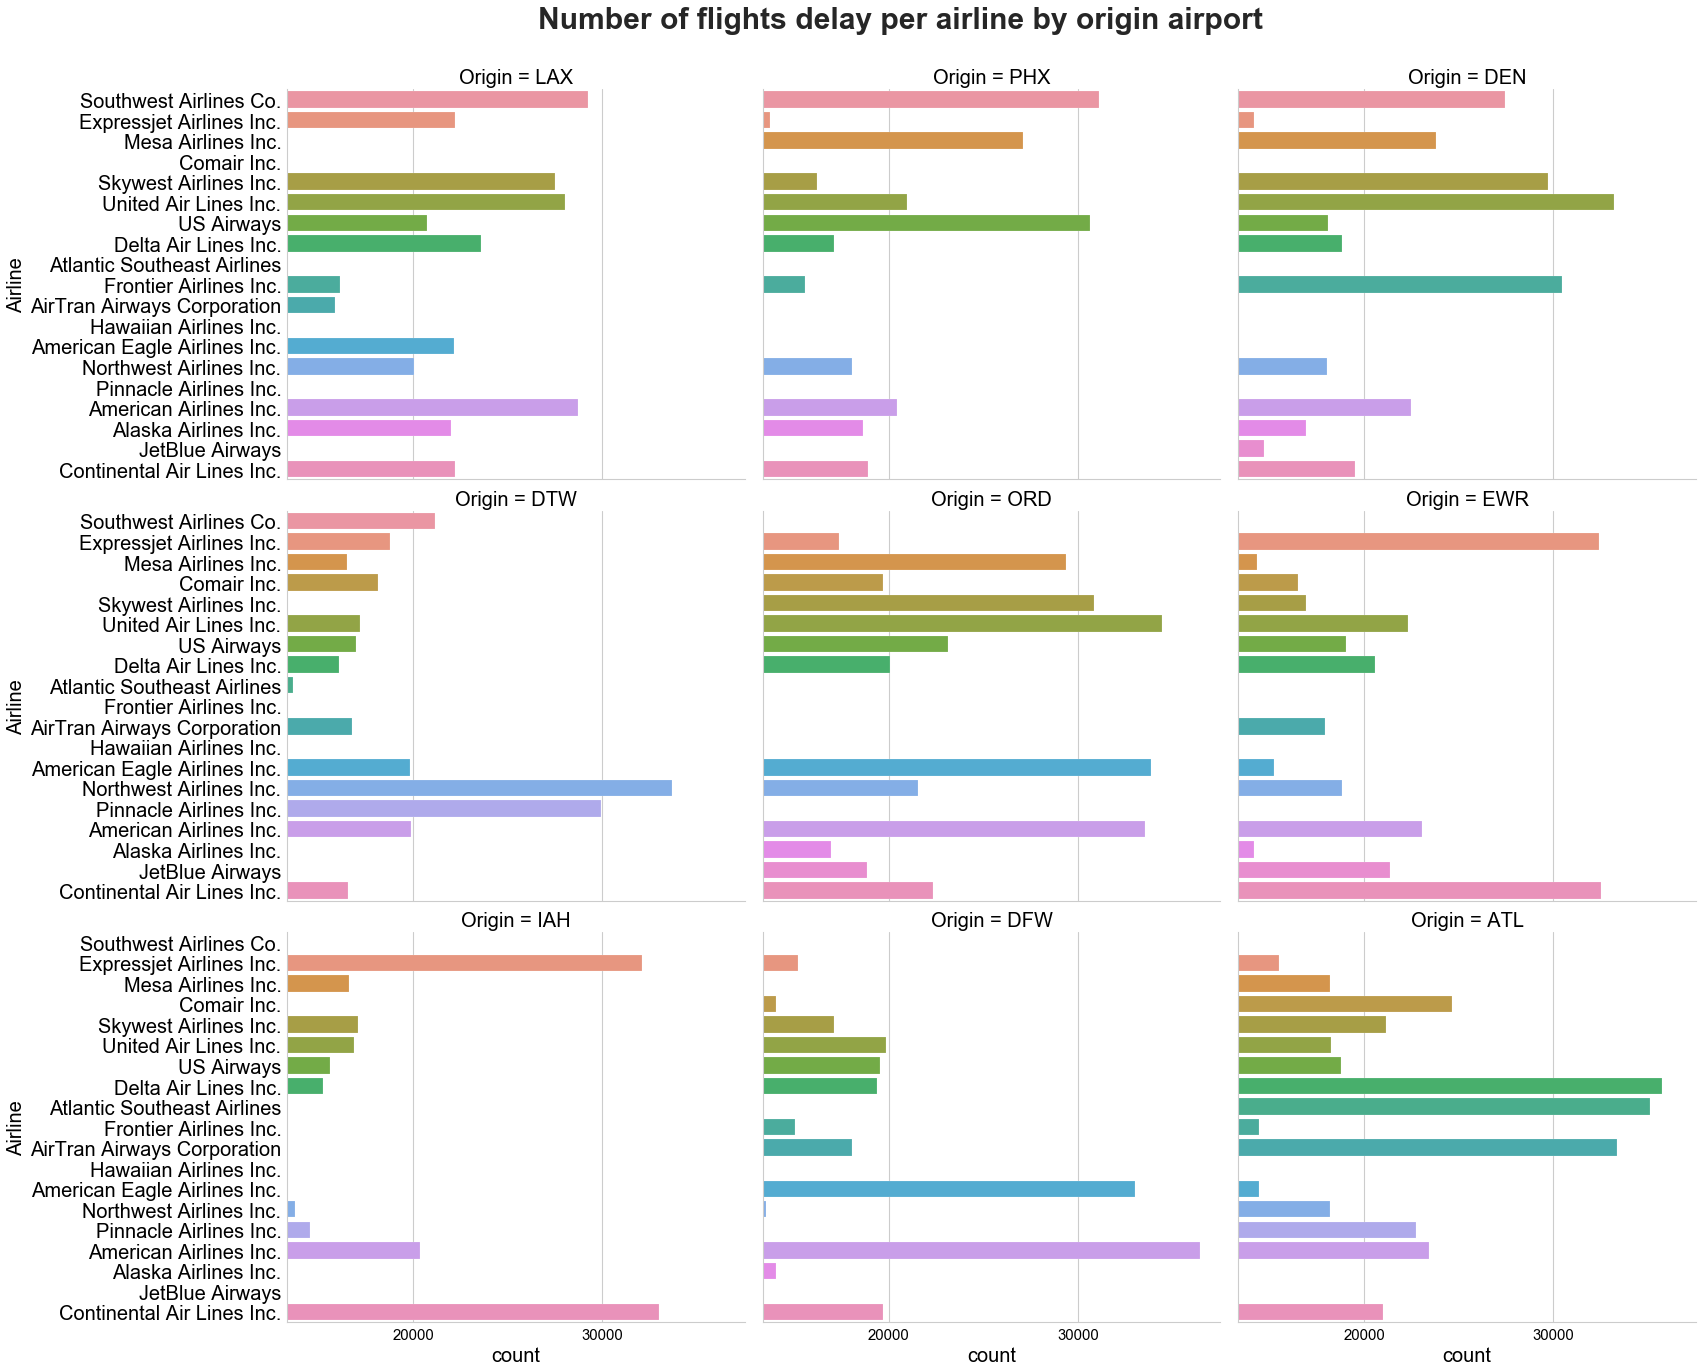

In [25]:
#Facetgrid showing the delayed departures from different airports using a log scale
g = sns.catplot(y='Description',col='Origin',data = df_2008_airlines, kind='count', col_wrap=3,height = 6,  aspect = (5)/(4))
g.set(xscale="log")
g.set_ylabels(label ='Airline', color = 'black', fontsize = 20)
g.set_xlabels(color = 'black', fontsize = 20)
g.set_titles(color = 'black',size = 20)
g.set_yticklabels(color='black', fontsize = 20)
g.set_xticklabels(color='black', fontsize =15)
plt.suptitle("Number of flights delay per airline by origin airport", y =1.04, fontsize = 30, weight = 'bold');

Given that CarrierDelay is one of the only delays that is in the control of airlines, we can look at how all the different airlines perform in this department and we can also look at the precentage of delayed flights by airline

In [18]:
#This cells creates the dataframe for the swarm plot
carrier_delay = data_clean_2008.filter(items=['Description','ArrDelay','WeatherDelay','CarrierDelay','NASDelay','SecurityDelay','LateAircraftDelay'])
carrier_delay_pivot = pd.pivot_table(carrier_delay, index = 'Description', aggfunc = 'sum')

#We get the split of the delays from a total of Arrdelay
carrier_delay_pivot['% CarrierDelay'] = (carrier_delay_pivot['CarrierDelay'] / carrier_delay_pivot['ArrDelay']) * 100
carrier_delay_pivot['% WeatherDelay'] = (carrier_delay_pivot['WeatherDelay'] / carrier_delay_pivot['ArrDelay']) * 100
carrier_delay_pivot['% NASDelay'] = (carrier_delay_pivot['NASDelay'] / carrier_delay_pivot['ArrDelay']) * 100
carrier_delay_pivot['% SecurityDelay'] = (carrier_delay_pivot['SecurityDelay'] / carrier_delay_pivot['ArrDelay']) * 100
carrier_delay_pivot['% LateAircraftDelay'] = (carrier_delay_pivot['LateAircraftDelay'] / carrier_delay_pivot['ArrDelay']) * 100

#format the table so that the swarm plot can be made
carrier_delay_plot =carrier_delay_pivot.drop(columns=['ArrDelay','ArrDelay','WeatherDelay','CarrierDelay','NASDelay','SecurityDelay','LateAircraftDelay'])
delay_df = pd.DataFrame(carrier_delay_plot.unstack(level=0)).reset_index()
delay_df = delay_df.rename(columns={'level_0':'Delay',0:'%'})
delay_df['Description'] = delay_df['Description'].replace('US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)',
                                                              'US Airways')

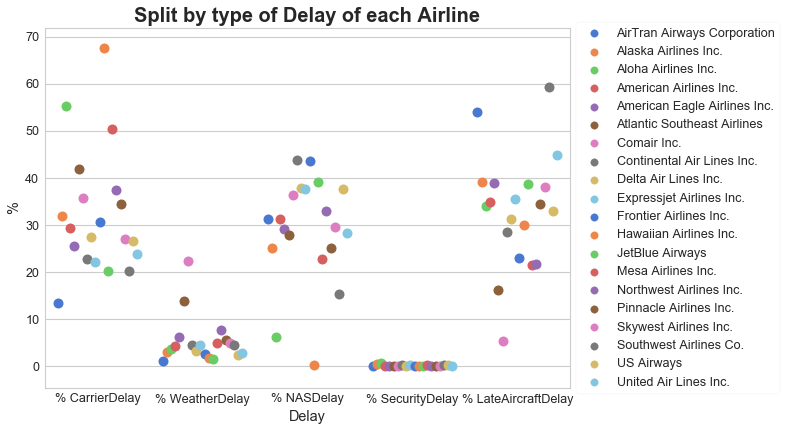

In [31]:
jtplot.style(figsize = (14.70,8.27))
ax = sns.swarmplot(x='Delay',  y='%', data=delay_df, hue='Description', split=True, size = 10, palette='muted')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.title('Split by type of Delay of each Airline', fontsize = 20, weight = 'bold')
plt.show()

# Results

 - The distribution of delays has changed over the years. Flights are now more frequently delayed for longer
 - Sunday had the longest average delays while June and December stood out for the delay by months. The total number of delays was also the largest in June
 - SouthWest Airlines stood out as the airline with most delays followed by American Airlines.
 - Delta and Atlantic were the most frequently delayed leaving Atlanta Airport while SouthWest airline had was more distributed across different airports
 - Alaska Airline and Aloha Airline also faired badly in the reasoning for delay, as Carrier Delay that is one of the only types of Delay that is in the control of airlines themselves.

In [33]:
!jupyter nbconvert Flights_project_final_slide_deck.ipynb --to slides --post serve --template output_toggle